In [13]:
!pip install pandas numpy matplotlib scikit-learn




  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 55.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 11.1/11.1 MB 69.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.3 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 51.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ---------------- ----------------------- 17.3/40.9 MB 91.1 MB/s eta 0:00:01
   --------------------------------- ------ 34.3/40.9 MB 87.2 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 70.4 MB/s eta

In [14]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1) Read CSV, parse Date and set as index in one go
path = r"C:\Users\Vai.Mathi\Downloads\SPX.csv\SPX.csv"
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

# 2) Slice 2019 and force a copy to safely modify
df_2019 = df.loc['2019-01-01':'2019-12-31'].copy()

# 3) Add the Open_T_plus_1 column
df_2019['Next Day Open'] = df_2019['Open'].shift(-1)

# 4) Drop the last row (it has no T+1) 
df_2019.dropna(subset=['Next Day Open'], inplace=True)

# Check
print(df_2019.shape)
df_2019.head()





(251, 7)


,Open,High,Low,Close,Adj Close,Volume,Next Day Open
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,2491.919922
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,2474.330078
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,2535.610107
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,2568.110107
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,2580.000000


In [17]:
df_2019.head()

,Open,High,Low,Close,Adj Close,Volume,Next Day Open
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,2491.919922
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,2474.330078
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,2535.610107
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,2568.110107
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,2580.000000


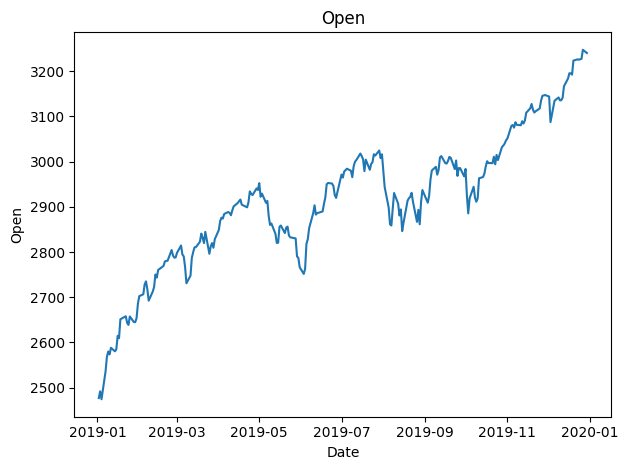

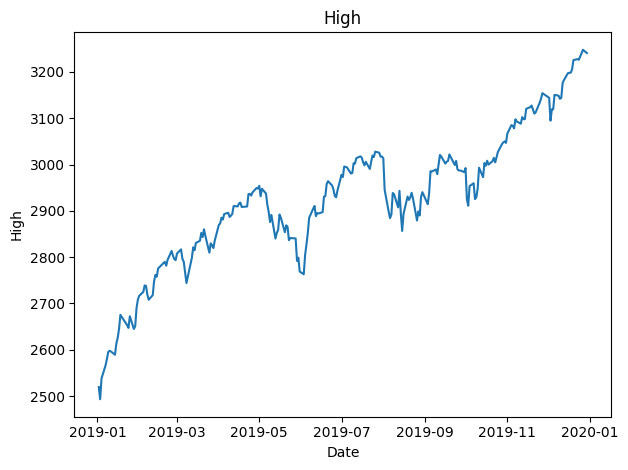

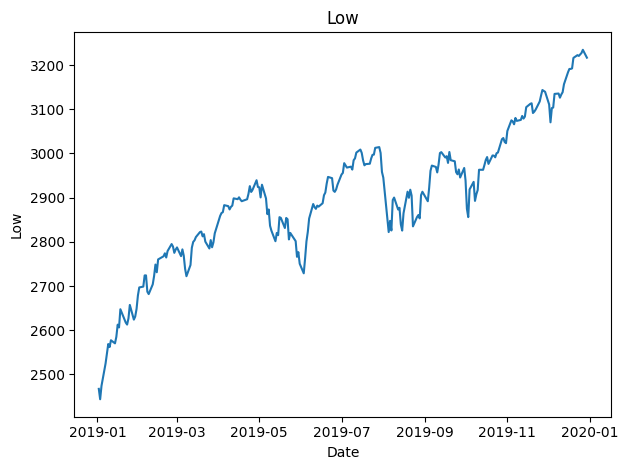

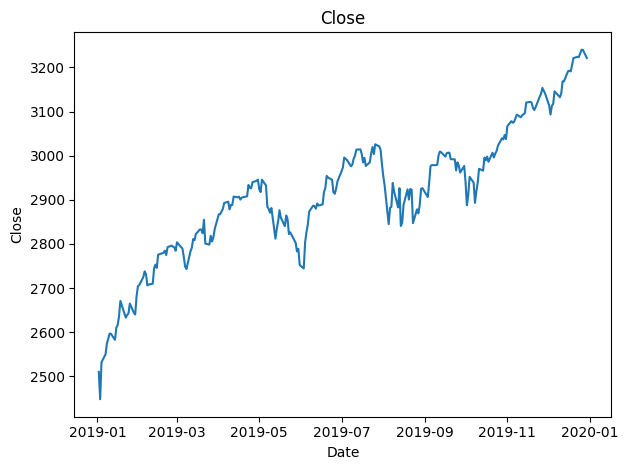

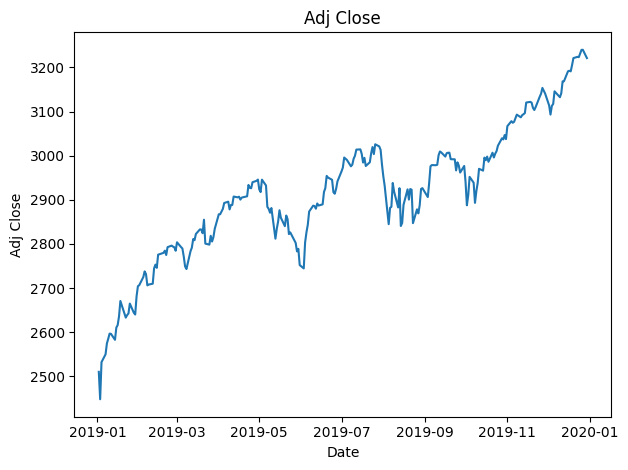

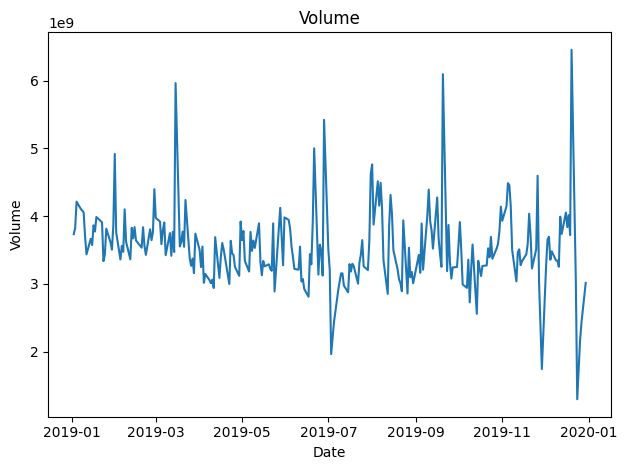

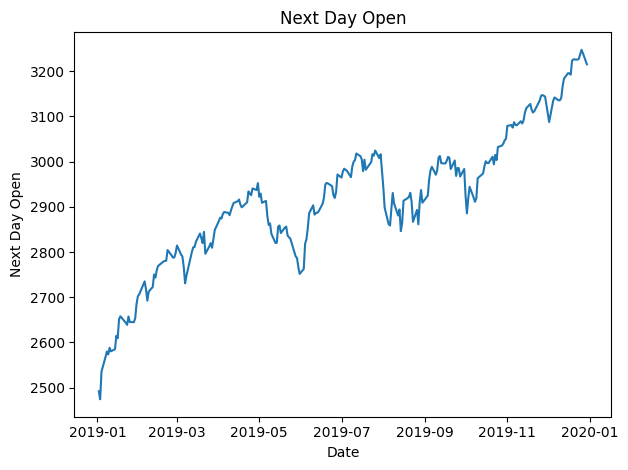

In [18]:


# if you haven’t already:
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df_2019 = df.loc['2019-01-01':'2019-12-31']

for col in df_2019.columns:
    plt.figure()
    plt.plot(df_2019.index, df_2019[col])
    plt.title(col)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997596  0.996276  0.993810   0.993810 -0.156749
High       0.997596  1.000000  0.996447  0.997131   0.997131 -0.153360
Low        0.996276  0.996447  1.000000  0.997695   0.997695 -0.174212
Close      0.993810  0.997131  0.997695  1.000000   1.000000 -0.168759
Adj Close  0.993810  0.997131  0.997695  1.000000   1.000000 -0.168759
Volume    -0.156749 -0.153360 -0.174212 -0.168759  -0.168759  1.000000


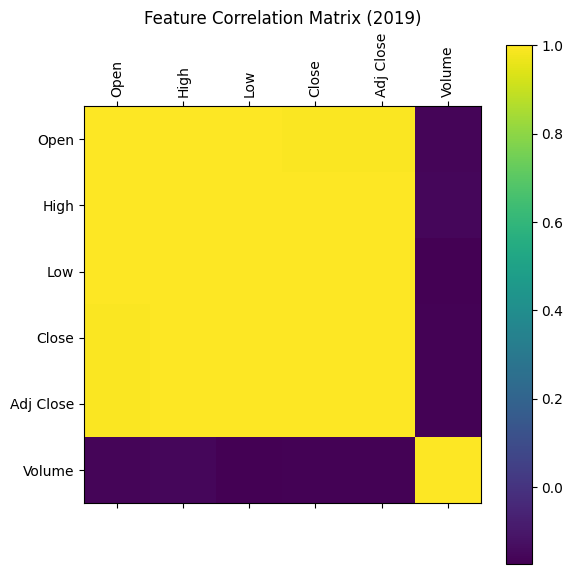

In [20]:

# 1) Grab only the feature columns (everything except your target)
features = df_2019.drop(columns=['Next Day Open'])

# 2) Compute the Pearson correlation matrix
corr = features.corr()

# 3) (Optional) print the raw numbers
print(corr)

# 4) (Optional) visualize as a heatmap with matplotlib
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.matshow(corr)              # color‐coded matrix
fig.colorbar(cax)                   # legend bar
ticks = range(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title("Feature Correlation Matrix (2019)")
plt.tight_layout()
plt.show()


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  2549.689941   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  2574.409912   

                Volume  
Date                    
2019-01-02  3733160000  
2019-01-03  3822860000  
2019-01-04  4213410000  
2019-01-07  4104710000  
2019-01-08  4083030000  
Date
2019-01-02    2491.919922
2019-01-03    2474.330078
2019-01-04    2535.610107
2019-01-07    2568.110107
2019-01-08    2580.000000
Name: Next Day Open, dtype: float64


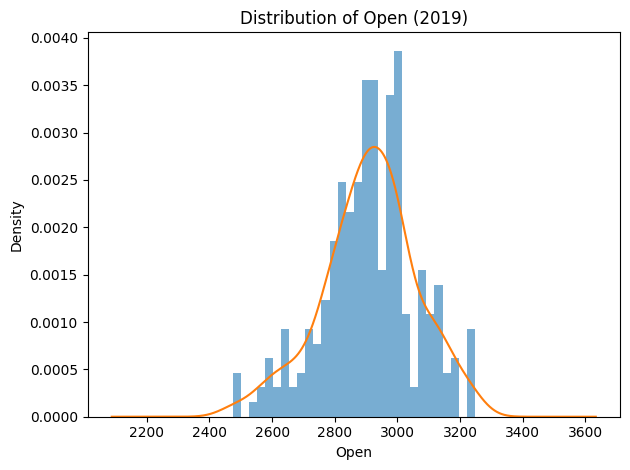

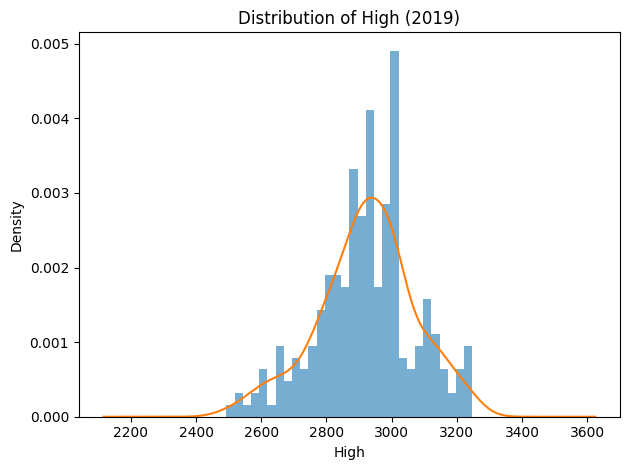

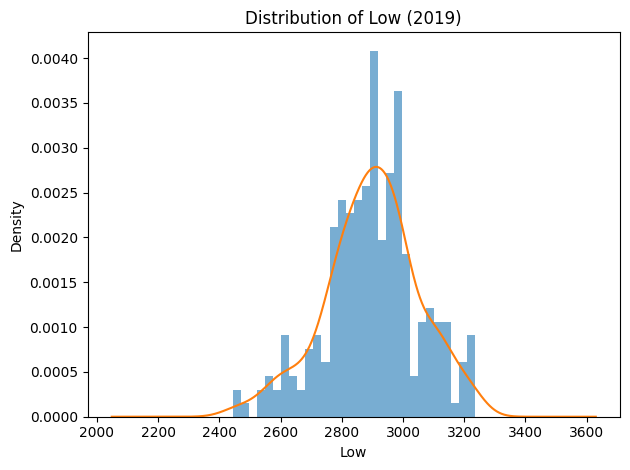

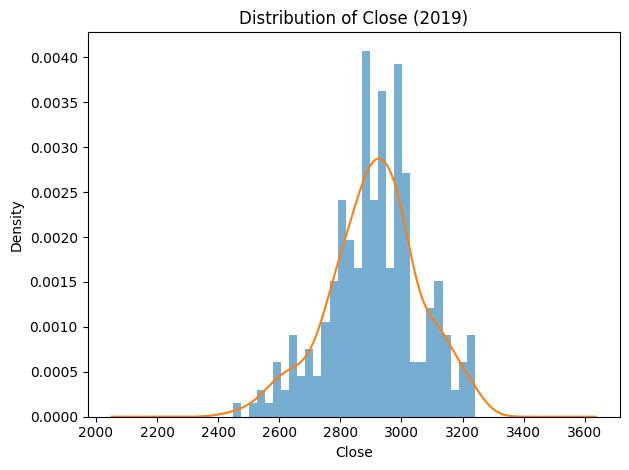

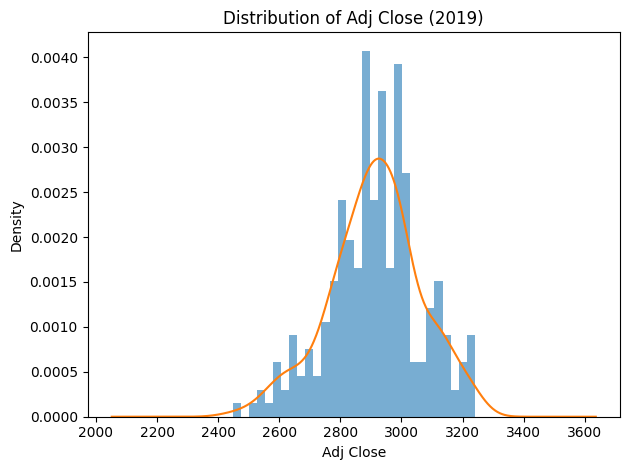

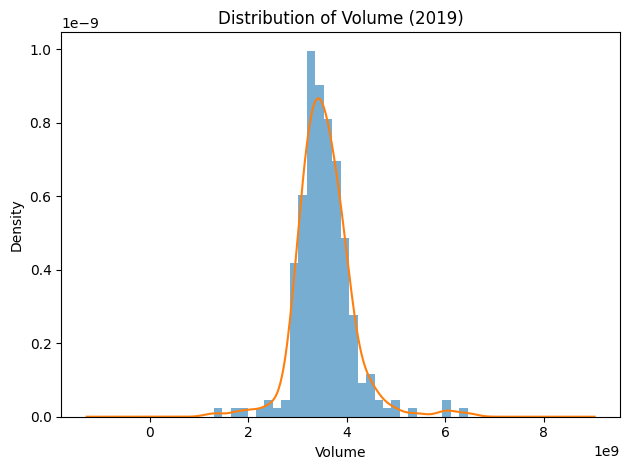

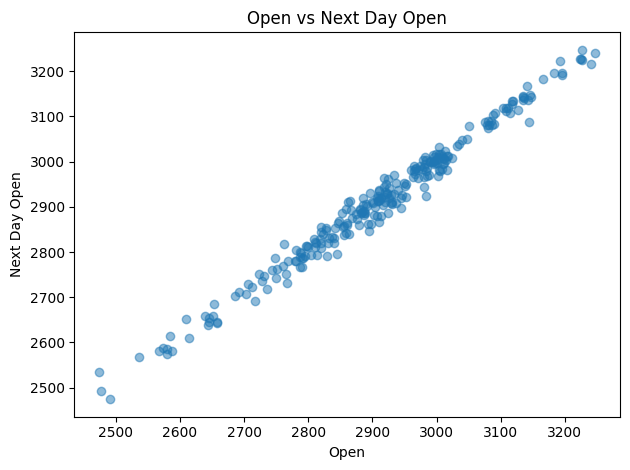

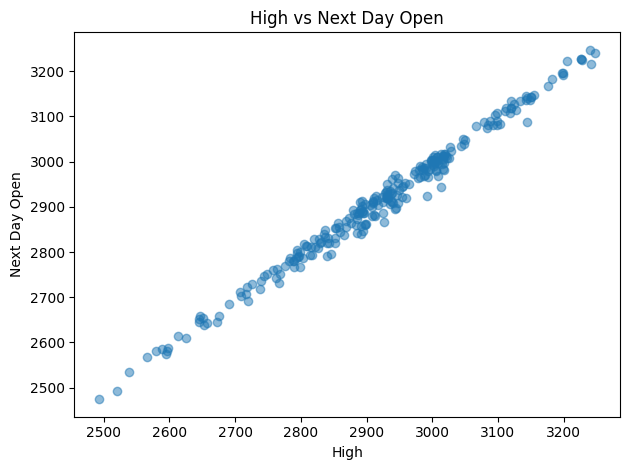

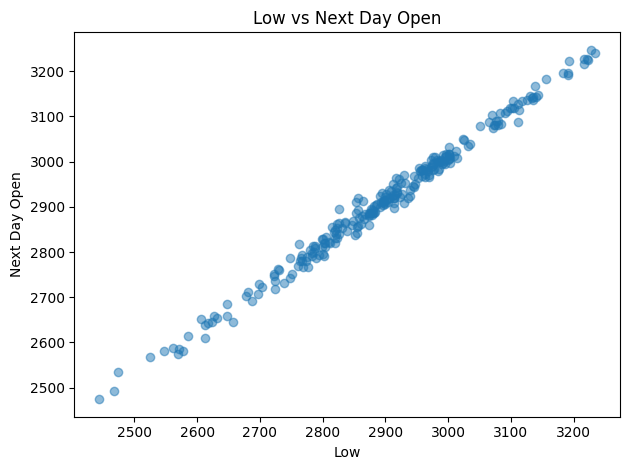

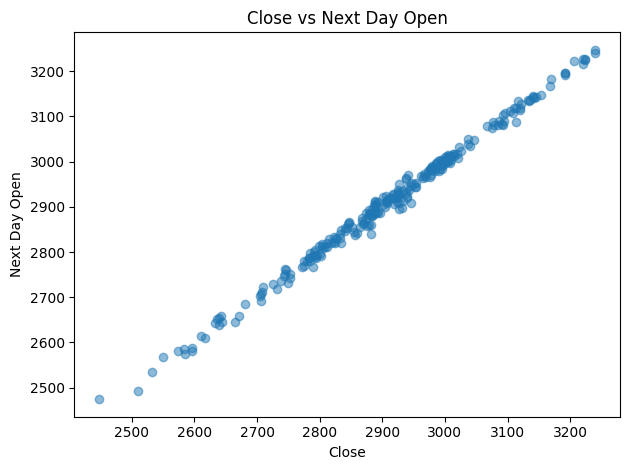

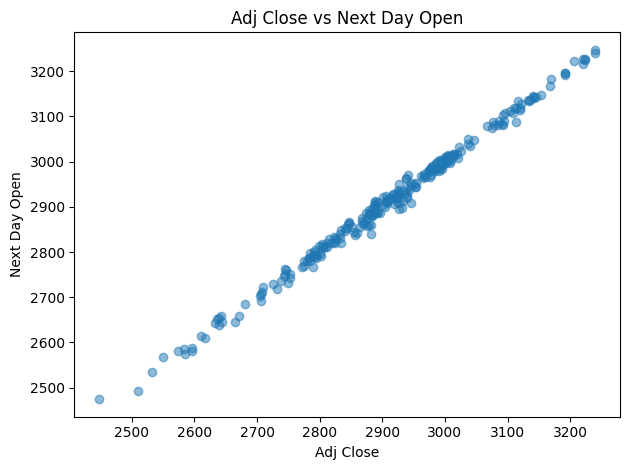

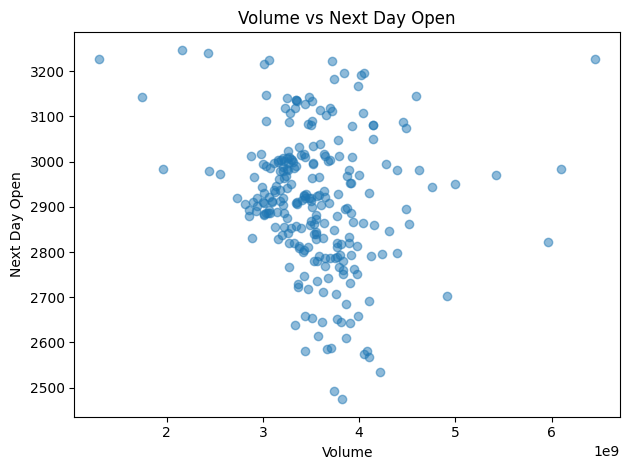

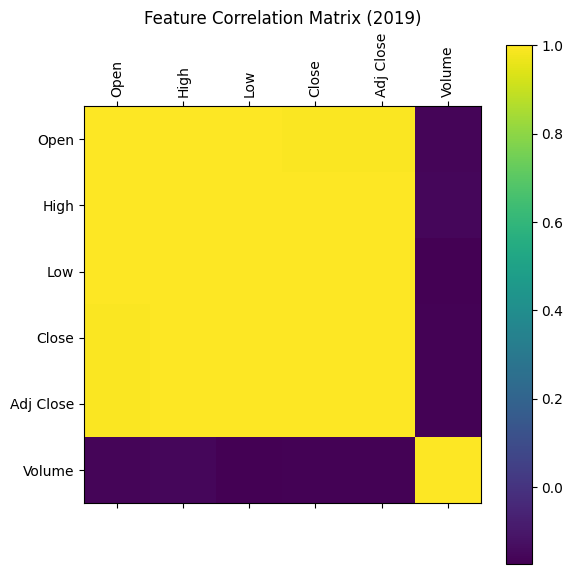

Explained variance ratio: [0.83677298 0.16112046]


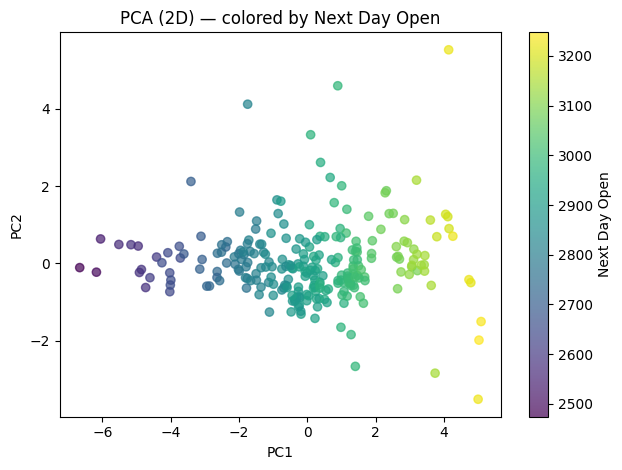

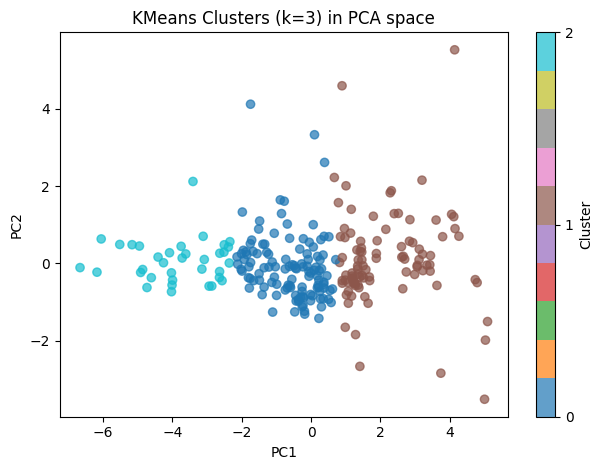

In [27]:

# 1) Split out features vs. target
features = df_2019.drop(columns=['Next Day Open'])
target   = df_2019['Next Day Open']
print(features.head())
print(target.head())

# 2) Plot individual feature distributions (hist + KDE)
for col in features.columns:
    plt.figure()
    ax = features[col].hist(bins=30, density=True, alpha=0.6)
    features[col].plot(kind='kde', ax=ax)
    plt.title(f'Distribution of {col} (2019)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# 3) Scatter each feature vs. target
for col in features.columns:
    plt.figure()
    plt.scatter(features[col], target, alpha=0.5)
    plt.title(f'{col} vs Next Day Open')
    plt.xlabel(col)
    plt.ylabel('Next Day Open')
    plt.tight_layout()
    plt.show()

# 4) Compute & plot Pearson correlation matrix
corr = features.corr()
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.matshow(corr)
fig.colorbar(cax)
ticks = range(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title('Feature Correlation Matrix (2019)')
plt.tight_layout()
plt.show()

# 5) Standardize features and run PCA → 2 components
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 6) Scatter PCA colored by Next Day Open (continuous)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=target, cmap='viridis', alpha=0.7)
plt.colorbar(label='Next Day Open')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2D) — colored by Next Day Open')
plt.tight_layout()
plt.show()

# 7) K-means clustering in the scaled feature space
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(ticks=range(3), label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters (k=3) in PCA space')
plt.tight_layout()
plt.show()


In [28]:
target   = df_2019['Next Day Open']

def preprocess_features(features):
    features = features.dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    return X_scaled

def preprocess_target(target):
    return target.dropna()

X_preprocessed = preprocess_features(features)
Y_preprocessed = preprocess_target(target)


In [31]:
print(features)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  2549.689941   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  2574.409912   
...                 ...          ...          ...          ...          ...   
2019-12-23  3226.050049  3227.780029  3222.300049  3224.010010  3224.010010   
2019-12-24  3225.449951  3226.429932  3220.510010  3223.379883  3223.379883   
2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  3239.909912   
2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  3240.020020   
2019-12-30  3240.090088  3240.919922  3216.570068  3

In [29]:
print(X_preprocessed)

[[-2.86988965 -2.72060068 -2.82430194 -2.69253031 -2.69253031  0.33467047]
 [-2.77084105 -2.89852877 -2.97845931 -3.1086709  -3.1086709   0.49280421]
 [-2.88730188 -2.59513937 -2.77931957 -2.54580383 -2.54580383  1.18131186]
 ...
 [ 2.09738406  2.14515803  2.15731966  2.19533549  2.19533549 -2.43748291]
 [ 2.23000114  2.19816389  2.20433512  2.19607286  2.19607286 -1.9650385 ]
 [ 2.18272854  2.15082904  2.08761851  2.07064177  2.07064177 -0.93440135]]


In [32]:
print(target)

Date
2019-01-02    2491.919922
2019-01-03    2474.330078
2019-01-04    2535.610107
2019-01-07    2568.110107
2019-01-08    2580.000000
                 ...     
2019-12-23    3225.449951
2019-12-24    3227.199951
2019-12-26    3247.229980
2019-12-27    3240.090088
2019-12-30    3215.179932
Name: Next Day Open, Length: 251, dtype: float64


In [30]:
print(Y_preprocessed)

Date
2019-01-02    2491.919922
2019-01-03    2474.330078
2019-01-04    2535.610107
2019-01-07    2568.110107
2019-01-08    2580.000000
                 ...     
2019-12-23    3225.449951
2019-12-24    3227.199951
2019-12-26    3247.229980
2019-12-27    3240.090088
2019-12-30    3215.179932
Name: Next Day Open, Length: 251, dtype: float64
